#Perceptrons

Here we will create a functions the make Peceptrons, the processors that make up a Neural Network. 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

To start, we need a model for nuerons. For this, we turn to the perceptron: an artificial neuron that takes an input (a vector) and evaluates it with weights and biases to output 1 or 0. There are a couple different ways to do this, so let's just explore the two major ones.

In [7]:
step_function = lambda x: 1 if not x < 0 else 0
# The step function will be used to output the neuron's evaluation
sigmoid = lambda x: 1/(1 +np.exp(-x))

# The sigmoid function is not exactly the same as the step function,
# but it's smoothness and differentiability makes it better for our use.

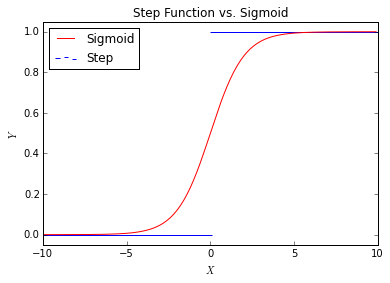

In [8]:
# Lets visualize the difference
x =np.arange(-10,10,0.1)
a = plt.subplot(1,1,1)
plt.plot(x, sigmoid(x), 'r',label= 'Sigmoid')
step_points = [step_function(x) for x in x]
plt.scatter(x, step_points, marker='_', label = 'Step')
plt.legend(loc='upper left')
plt.title('Step Function vs. Sigmoid')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.xlim(-10,10)
plt.ylim(-0.05,1.05)
a.get_xaxis().tick_bottom()
# Here's the difference between the Sigmoid and Step Functions graphed out

Now, using the sigmoid function, lets make our perceptrons. Perceptron operate by this formula:
$$threshold_{p}=w_{j}(z_{j})$$
where $z_{j}$ is the input vector that the perceptron recieves, $w_{j}$ is the vector of weights in the perceptron, and the threshold is the minimum value the dot product of the weight and input vectors must be for the perceptron to "fire."
If we subtract the threshold to the other side, we have a much more codable formula.
$$w_{j}(z_{j}) + b_{p} = 0$$
$$b_{p} = -threshold$$
By writing the formula like this, we introduce a term called the bias ($b_{p}$). The bias is a scalar term that the determines what values of $w_{j}(z_{j})$ will fire. If $w_{j}(z_{j}) + b_{p}$ returns positive, the perceptron should fire (return a 1); if negative, the perceptron should not fire (return a 0). To get $w_{j}(z_{j}) + b_{p}$ to fire a 1 or 0, we plug it into our step or sigmoid function.

In [9]:
def perceptron_step(weights, inputvect):
    return step_function(np.dot(np.append(inputvect,[1]), weights))
#This is the step function version of the perceptron. 

def perceptron_sigmoid(weights, inputvect):
    return sigmoid(np.dot(np.append(inputvect,[1]), weights))
# This is the sigmoid function version of the perceptron. 



The perceptrons take in two lists: one for weights 
with the last term being the bias, and one for the input. 
The number of weights equals the number of inputs making 
the size of the input vector one less than the weights plus 
bias vector, so the input list gets $[1]$ added to it to 
allow a dot product between the weights and input vectors
and keeping the computation $<weights,inputs> + \ bias$.

So, if we have an input, we need a way to propogate that data through our perceptrons to getan output. This function will allow us to do that. 

In [10]:
def propforward(network, inputvect):
    outputs = []
    for i, l_i in enumerate(network):
        neural_input = inputvect
        output = [perceptron_sigmoid(weights, neural_input) for weights in l_i]
        outputs.append(output)
        inputvect = output
    
    outputs = np.array(outputs)
    return [outputs[:-1], outputs[-1]]

So one thing we can do with a network of perceptrons is create an XOR gate which is mathematically impossible to do with one perceptron. First, our hidden layer will be composed of a XAND gate (with two 20 weights and a bias of -30) and an OR gate (with two 20 weights and a bias of -10). Then, our outer layer will be a gate with a -60 weight, a 60 weight, and a -30 bias. 

In [14]:
# Here we make a xor gate with a neural network

#Hidden Layers
xor_hweights = np.array([[20,20,-30],[20,20,-10]])
#Output Layer
xor_oweights = np.array([[-60,60,-30]])

network = [xor_hweights, xor_oweights]



hidden_outputs, outputs = propforward(network, [0,1])
print(hidden_outputs)
print()
print(outputs)

[[4.5397868702434395e-05, 0.99995460213129761]]

[0.99999999999990585]


So our Propforward function always outputs a list of two arrays. The first array is the hidden outputs with each layer of perceptron's outputs forming a row of the array. The second array is the network's final output. 

In [115]:
# Assertion Statements

assert step_function(1)==1
assert step_function(0)==1
assert step_function(-4)==0
# Checking the Step function

assert round(sigmoid(-4))==0
assert sigmoid(0)==0.5
assert round(sigmoid(1))==1
# Checking the sigmoid function

and_gate = [2,2,-3]
or_gate = [2,2,-1]
input1= [0,1]
input2= [1,1]
input3= [0,0]
assert perceptron_step(and_gate, input1)==0
assert perceptron_step(and_gate, input2)==1
assert perceptron_step(and_gate, input3)==0
assert perceptron_step(or_gate, input1)==1
assert perceptron_step(or_gate, input2)==1
assert perceptron_step(or_gate, input3)==0
# Checking the Step function neuron

assert round(perceptron_sigmoid(and_gate, input1))==0
assert round(perceptron_sigmoid(and_gate, input2))==1
assert round(perceptron_sigmoid(and_gate, input3))==0
assert round(perceptron_sigmoid(or_gate, input1))==1
assert round(perceptron_sigmoid(or_gate, input2))==1
assert round(perceptron_sigmoid(or_gate, input3))==0
# Checking the Sigmoid function neuron

xor_network = [
    [[20,20,-30],
    [20,20,-10]],
    [[-60,60,-30]]
]
assert round(propforward(xor_network, [1,0])[-1][0])==1
assert round(propforward(xor_network, [1,1])[-1][0])==0